# Import Dependacies

In [1]:
import string
import pickle
import mediapipe as mp
import matplotlib.pyplot as plt

from data.collect_images import collect_images
from data.create_dataset import build_dataset
from classifier.train_classifier import train_model, plot_confusion_matrix

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
DATA_DIR  = "./data"
MODEL_DIR = "./classifier"

data_path   = f"{DATA_DIR}/data.pickle"
number_path = f"{DATA_DIR}/number.pickle"

model_letter_path = f"{MODEL_DIR}/classify_letter_model.p"
model_number_path = f"{MODEL_DIR}/classify_number_model.p"

label_size = 200                #@param {type:"integer"}
min_detection_confidence = 0.5  #@param {type:"slider", min:0, max:1, step:0.01}

In [3]:
# Check type of GPU and VRAM available
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

NVIDIA GeForce RTX 3090, 24576 MiB, 23111 MiB


# Setup MediaPipe

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(
    static_image_mode=True, 
    min_detection_confidence=min_detection_confidence
)

# Train American Alphabets

## Collect Images

In [5]:
# 'Unknown' Class for handling duplicate alphabets
label_class = list(string.ascii_uppercase) + ['Unknown_Letter']
print(f"There are {len(label_class)} labels.")

There are 27 labels.


In [5]:
collect_images(label_class, DATA_DIR, label_size)

## Build DataSet

In [6]:
build_dataset(hands, DATA_DIR, letter=True)

Labels: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'UNKNOWN_LETTER']


## Train Classifier Model

In [7]:
data_dict = pickle.load(open(data_path, 'rb'))

# Start debugging (dimension should be 42)
indices_to_remove = []
for i, val in enumerate(data_dict['data']):
    if len(val) != 42:
        print(f"Dimension: {len(val)}, line: {i}, Class: {data_dict['labels'][i]}")
        indices_to_remove.append(i)

# Clean data and labels
for index in sorted(indices_to_remove, reverse=True):
    del data_dict['data'][index]
    del data_dict['labels'][index]

In [8]:
y_predict, y_test = train_model(data_dict, model_letter_path)

100.00% of samples were classified correctly!


Classification Report:
                precision    recall  f1-score   support

             A     1.0000    1.0000    1.0000        40
             B     1.0000    1.0000    1.0000        40
             C     1.0000    1.0000    1.0000        40
             D     1.0000    1.0000    1.0000        40
             E     1.0000    1.0000    1.0000        40
             F     1.0000    1.0000    1.0000        40
             G     1.0000    1.0000    1.0000        40
             H     1.0000    1.0000    1.0000        40
             I     1.0000    1.0000    1.0000        40
             J     1.0000    1.0000    1.0000        39
             K     1.0000    1.0000    1.0000        40
             L     1.0000    1.0000    1.0000        40
             M     1.0000    1.0000    1.0000        40
             N     1.0000    1.0000    1.0000        40
             O     1.0000    1.0000    1.0000        40
             P     1.0000    1.0000    1.0000        40
             Q     1.000

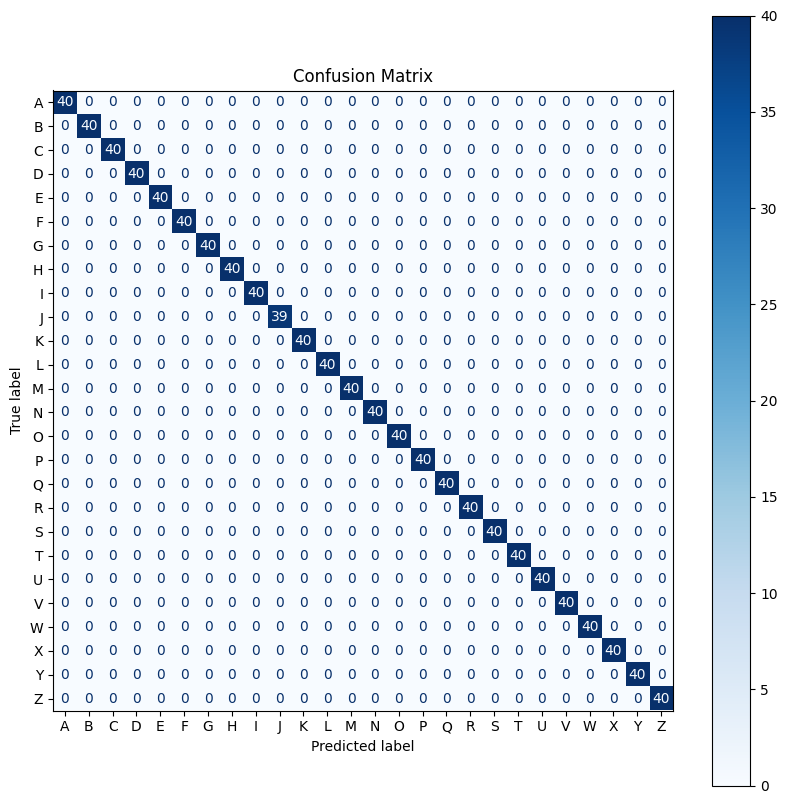

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(y_predict[:-1], y_test[:-1], label_class[:-1], ax)

# Train American Number

## Collect Images

In [9]:
# 'Unknown' Class for handling duplicate alphabets
label_class = list(map(str, range(10))) + ['Unknown_Number']
print(f"There are {len(label_class)} labels.")

There are 11 labels.


In [6]:
collect_images(label_class, DATA_DIR, label_size)

## Build DataSet

In [6]:
build_dataset(hands, DATA_DIR, letter=False)

Labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'UNKNOWN_NUMBER']


## Train Classifier Model

In [6]:
number_dict = pickle.load(open(number_path, 'rb'))

# Start debugging (dimension should be 42)
indices_to_remove = []
for i, val in enumerate(number_dict['data']):
    if len(val) != 42:
        print(f"Dimension: {len(val)}, line: {i}, Class: {number_dict['labels'][i]}")
        indices_to_remove.append(i)

# Clean data and labels
for index in sorted(indices_to_remove, reverse=True):
    del number_dict['data'][index]
    del number_dict['labels'][index]

In [7]:
y_predict, y_test = train_model(number_dict, model_number_path)

100.00% of samples were classified correctly!


Classification Report:
                precision    recall  f1-score   support

             0     1.0000    1.0000    1.0000        40
             1     1.0000    1.0000    1.0000        40
             2     1.0000    1.0000    1.0000        40
             3     1.0000    1.0000    1.0000        40
             4     1.0000    1.0000    1.0000        40
             5     1.0000    1.0000    1.0000        39
             6     1.0000    1.0000    1.0000        40
             7     1.0000    1.0000    1.0000        40
             8     1.0000    1.0000    1.0000        40
             9     1.0000    1.0000    1.0000        40
UNKNOWN_NUMBER     1.0000    1.0000    1.0000        40

      accuracy                         1.0000       439
     macro avg     1.0000    1.0000    1.0000       439
  weighted avg     1.0000    1.0000    1.0000       439




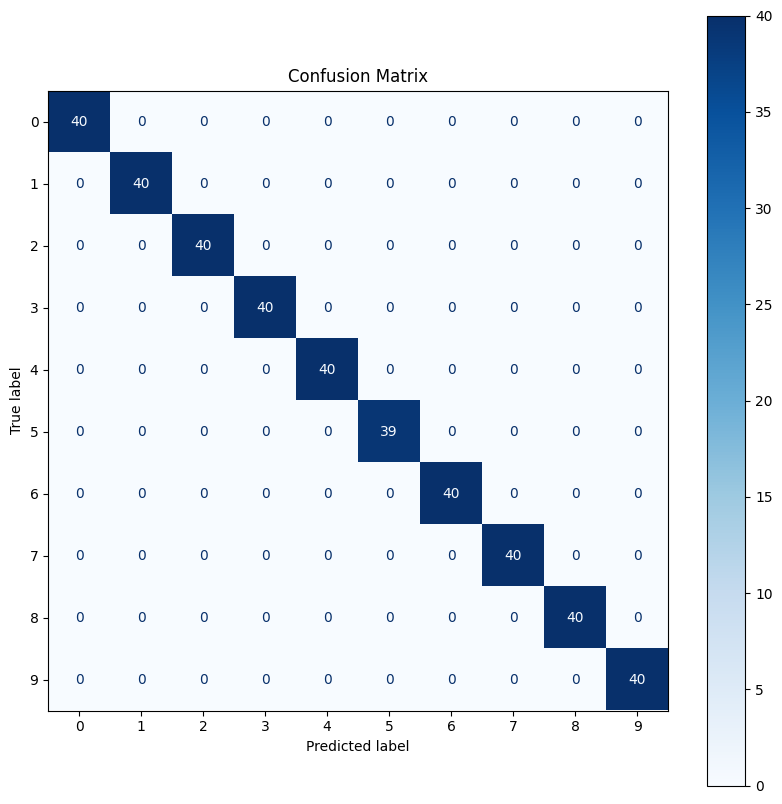

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(y_predict[:-1], y_test[:-1], label_class[:-1], ax)

# End of the Notebook